In [1]:
# 기본 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

import matplotlib.font_manager as fm 
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

#pip install mglearn
import mglearn      # 머신러닝 학습을 위한 모듈

import sklearn.datasets as datasets
import sklearn.metrics

## Naive Bayes

    선형 모델과 유사(LogisticRegression, LinearSVC, ...)
    훈련 속도가 빠르지만 일반화 성능이 조금 뒤쳐짐
    연속적인 데이터 : GaussianNB
    이산 데이터 : BernoulliNB, MultinomialNB
    alpha 파라미터를 통해 복잡도 조절
    
    
        P(B|A) = (P(A|B)P(B))/P(A)   나이브 베이즈
        독립사건 P(A교B)=P(A)P(B)
        배반사건 P(A교B)=공집합
    
    

In [2]:
# GaussianNB
iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris. target, test_size =0.2)

In [3]:
from sklearn.naive_bayes import GaussianNB

In [4]:
model = GaussianNB().fit(X_train, y_train)

In [5]:
pred = model.predict(X_test)

In [6]:

print(sklearn.metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.90      0.95        10
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Mutinomial NB : 영화 리뷰

In [7]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]
df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [8]:
df["label"]=df["type"].map({"positive":1,"negative":0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [9]:
df_x = df["movie_review"]
df_y = df["label"]

In [10]:
# 입력데이터는 고정된 크기의 벡터로써, 각각의 인덱스는 단어의 빈도수로 구분
# cha-noeul babo
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

cv = CountVectorizer()
x_traincv = cv.fit_transform(df_x)
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [11]:
cv.inverse_transform(encoded_input[0])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [12]:
cv.get_feature_names()

['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [13]:
mnb = MultinomialNB()
y_train = df_y.astype("int")
mnb.fit(x_traincv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [14]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

test_df = pd.DataFrame(test_feedback_list)
test_df["label"] = test_df["type"].map({"positive":1, "negative":0})
test_x = test_df["movie_review"]
test_y = test_df["label"]

In [15]:
x_testcv = cv.transform(test_x)
x_testcv

<10x37 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [16]:

pred = mnb.predict(x_testcv)
pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [17]:
# 베르누이 NB : 스팸메일 구분
from sklearn.naive_bayes import BernoulliNB

In [18]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

df = pd.DataFrame(email_list)
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False


In [19]:
df['label'] = df['spam'].map({True : 1, False : 0})
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


In [20]:
df_x = df['email title']
df_y = df['label']

In [21]:
# 입력데이터는 고정된 크기의 벡터로써 0과 1로 구분
cv = CountVectorizer(binary = True)
x_traincv = cv.fit_transform(df_x)
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [22]:
cv.inverse_transform(encoded_input[0])
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

In [23]:
bnb = BernoulliNB()
y_train = df_y.astype("int")
bnb.fit(x_traincv, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [24]:
test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]


test_df=pd.DataFrame(test_email_list)
test_df["label"] = test_df["spam"].map({True:1, False:0})
test_x = test_df["email title"]
test_y = test_df["label"]
x_testcv = cv.transform(test_x)

In [25]:
pred = bnb.predict(x_testcv)
pred

array([1, 1, 1, 0, 0, 1])

In [26]:
accuracy_score(test_y,pred)

0.8333333333333334

### 비지도 학습

1) 클러스터링
    - K-meands
    - D-scan, PCA, ...

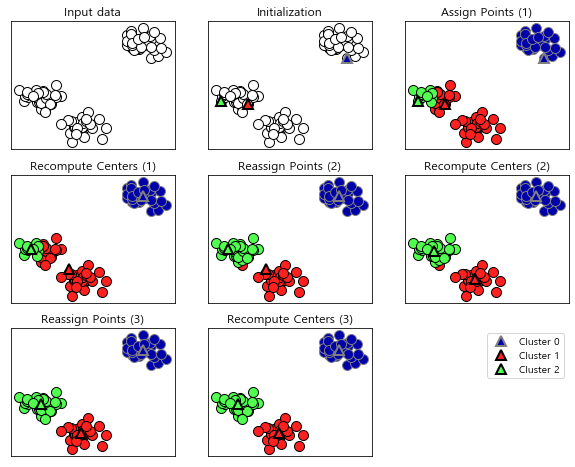

In [27]:
mglearn.plots.plot_kmeans_algorithm()

In [28]:
from sklearn.cluster import KMeans

In [29]:
X,y = sklearn.datasets.make_blobs()

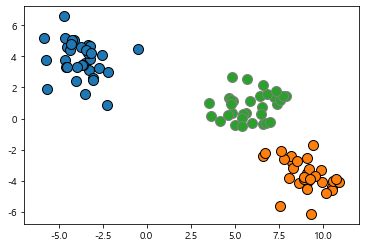

In [30]:
mglearn.discrete_scatter(X[:,0],X[:,1],y,markers="o")

In [31]:
km = KMeans(n_clusters=3).fit(X)

In [32]:
lbl=km.labels_

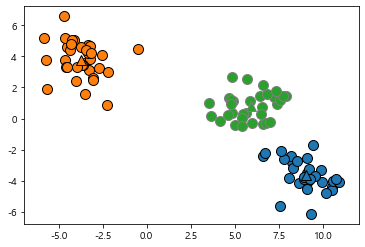

In [33]:
mglearn.discrete_scatter(X[:,0],X[:,1],lbl,markers="o")
mglearn.discrete_scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], [0, 1, 2], markers='^')

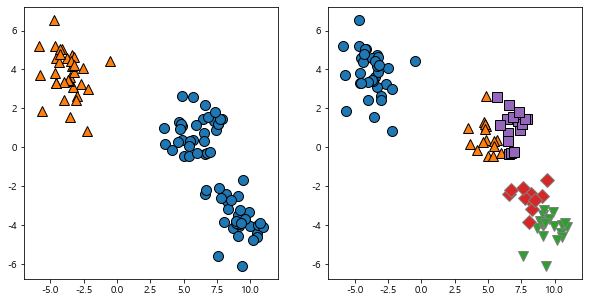

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

idx = 0
for k in [2, 5]:
    km = KMeans(n_clusters=k).fit(X)
    lbl = km.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, ax=axes[idx])
    idx += 1
    

In [35]:
# iris 샘플
iris = sklearn.datasets.load_iris()
X = pd.DataFrame(iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris.target, columns=["target"])

X.head()
y.head()

,target
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, '꽆잎')

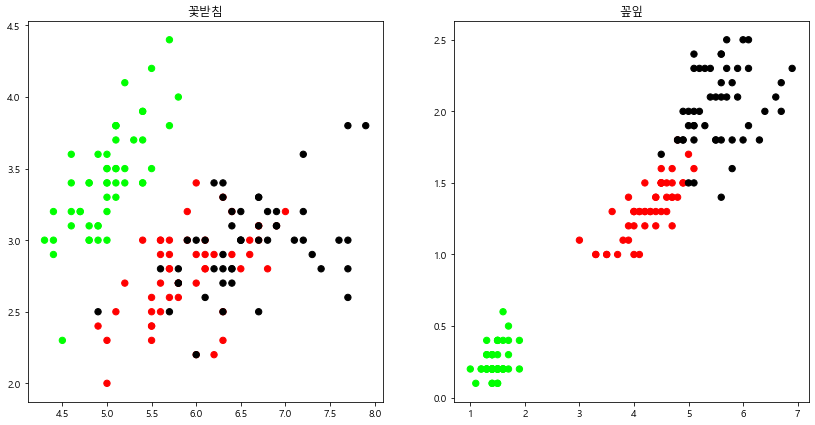

In [36]:
plt.figure(figsize=(14,7))
colormap=np.array(["lime","red","black"])

plt.subplot(1,2,1)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], s=40)
plt.title("꽃받침")

plt.subplot(1,2,2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], s=40)
plt.title("꽆잎")

In [37]:
model = KMeans(n_clusters=3).fit(X)

In [38]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

Text(0.5, 1.0, '결과 : babo')

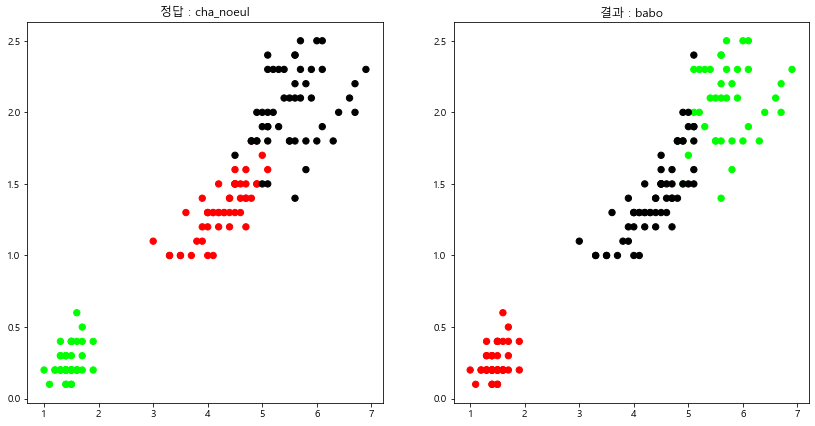

In [39]:
plt.figure(figsize = (14, 7))
colormap = np.array(['lime', 'red', 'black'])

plt.subplot(1, 2, 1)
plt.scatter(X.petal_length, X.petal_width, c = colormap[y.target], s = 40)
plt.title('정답 : cha_noeul')

plt.subplot(1, 2, 2)
plt.scatter(X.petal_length, X.petal_width, c = colormap[model.labels_], s = 40)
plt.title('결과 : babo')

In [40]:
accuracy_score(y, model.labels_)

0.09333333333333334

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, model.labels_)

array([[ 0, 50,  0],
       [ 2,  0, 48],
       [36,  0, 14]], dtype=int64)

In [42]:
# 사람의 키와 몸무게
df = pd.DataFrame(columns=["height", "weight"])
df.loc[0] = [185, 60]
df.loc[1] = [180, 60]
df.loc[2] = [185, 70]
df.loc[3] = [165, 63]
df.loc[4] = [155, 68]
df.loc[5] = [170, 75]
df.loc[6] = [175, 80]

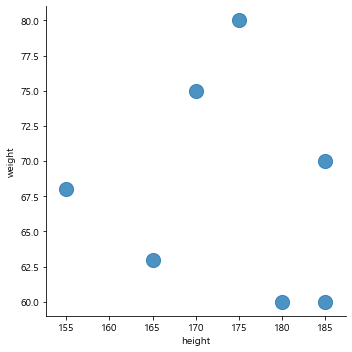

In [43]:
# 사람의 키와 몸무게
df = pd.DataFrame(columns=["height", "weight"])
df.loc[0] = [185, 60]
df.loc[1] = [180, 60]
df.loc[2] = [185, 70]
df.loc[3] = [165, 63]
df.loc[4] = [155, 68]
df.loc[5] = [170, 75]
df.loc[6] = [175, 80]

sns.lmplot("height", "weight", data=df, fit_reg=False, scatter_kws={"s":200})

In [44]:

model = KMeans(n_clusters=3).fit(df.values)

In [45]:
df["label"] = model.labels_
df

,height,weight,label
0,185,60,0
1,180,60,0
2,185,70,0
3,165,63,2
4,155,68,2
5,170,75,1
6,175,80,1


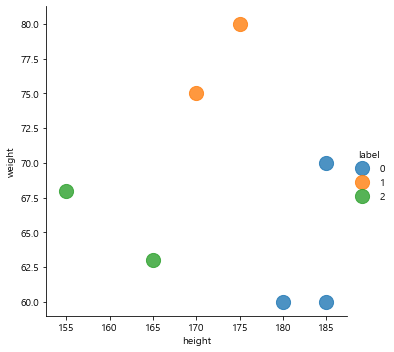

In [46]:
sns.lmplot("height", "weight", data=df, fit_reg=False, scatter_kws={"s":200}, hue="label")

# 사례 : 타이타닉을 이용한 분류 알고리즘 성능 비교

## 부제 : 캐글 제출용 

https://jfun.tistory.com/137?category=828812


### 1. Collecting the data

In [47]:
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

### 2. Exploratiory Data Analysis

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
print(train.shape)
print(test.shape)
print(train.info())
print(test.info())

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null

In [50]:
"""
데이터 구조
PassengerId : 승객 id, 1부터 시작하는 인덱스 번호
Survived : 생존여부. 0 - 사망, 1 - 생존
Pclass : 티켓등급. 1 - 1등석, 2 - 2등석, 3 - 3등석
Name : 승객이름
Sex : 성별, male - 남성, female - 여성
Age : 나이
SibSp : 동승한 형제 자매의 수
Parch : 동승한 부모 자식의 수
Ticket : 티켓 번호
Fare : 요금
Cabin : 객실번호
Embarked : 탑승한 선착장, C - Cherbourg, Q - Queenstown, S - Southampton
"""

# 시각화 함수
def bar_chart(feature) :
    # 특성에 따라 생존자 수를 구한다.
    survived = train[train['Survived'] == 1][feature].value_counts()
 
    
    dead= train[train['Survived'] == 0][feature].value_counts()

    
    # 시각화를 위해 데이터프레임을 생성한다.
    df = pd.DataFrame([survived, dead])
    # 인덱스
    df.index = ['Survived', 'Dead']
    # 그린다.
    df.plot(kind='bar',stacked=True, figsize=(10, 5))
    


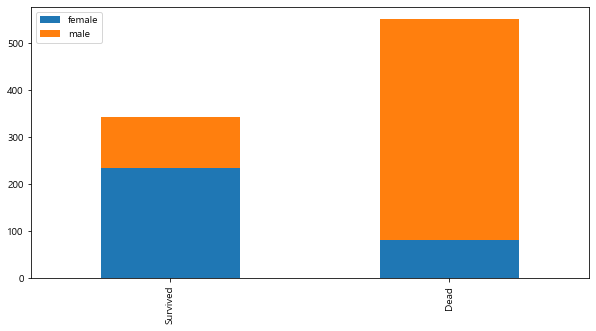

In [51]:
bar_chart("Sex")

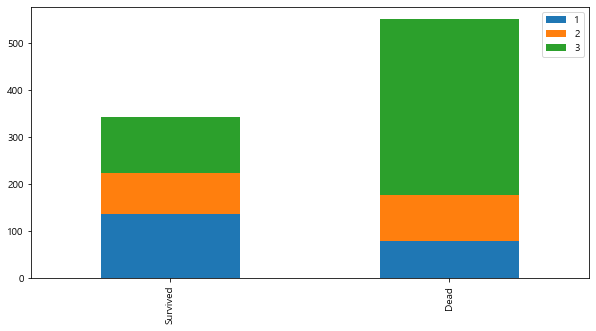

In [52]:
bar_chart("Pclass")

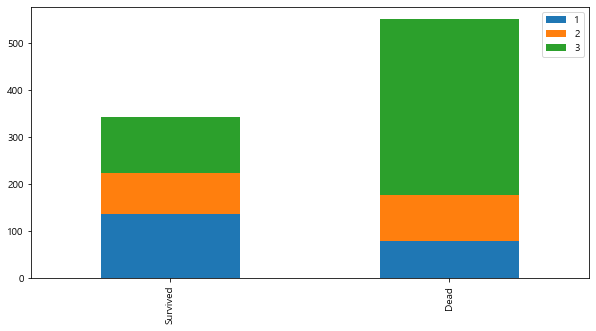

In [53]:
bar_chart("Pclass")

## 3. Feature Eng.

Name : Mr,Mrs, Miss 추출

In [54]:
train_test_data = [train, test] #훈련 및 시험 데이터 세트 결합

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.')

In [55]:
print(train['Title'].value_counts())
print(test['Title'].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Sir           1
Jonkheer      1
Mme           1
Ms            1
Lady          1
Capt          1
Don           1
Countess      1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [56]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


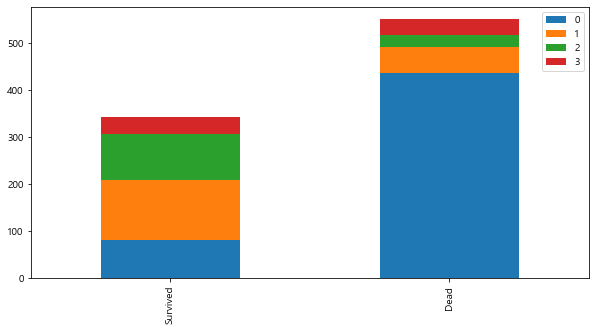

In [58]:
bar_chart('Title')

In [59]:
# 데이터 셋에서 불필요한 feature 삭제
train. drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [61]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({"male": 0, "female":1})

In [62]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2.0


### Age 데이터의 binning

In [63]:
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            1
dtype: int64

In [64]:
# Missing Age를 각 Title에 대한 연령의 중간값 으로 채운다(Mr, Mrs, Miss, Others)
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [65]:
train.isnull().sum()
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            1
dtype: int64

In [66]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <16, 'Age']=0,
    dataset.loc[(dataset['Age'] >= 16) & (dataset['Age'] <=26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] >= 26) & (dataset['Age'] <=36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] >= 36) & (dataset['Age'] <=62), 'Age'] = 3,
    dataset.loc[(dataset['Age'] >= 62), 'Age'] = 4

In [67]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,3.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2.0


In [68]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [69]:
train['Embarked'] = train['Embarked'].fillna('S')

In [70]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [71]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [72]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [73]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

### Fare Feature의 결측치 처리와 binnning

In [74]:
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [75]:
test["Fare"].isnull().sum()

0

In [76]:
# Fare의 binning
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <=17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <=30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <=100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

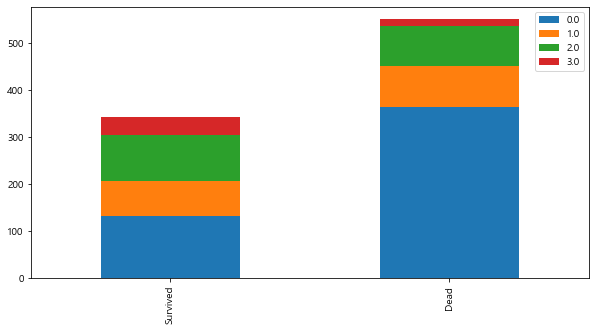

In [77]:
bar_chart("Fare")

### Cabin 데이터 처리

In [78]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
D              3
              ..
F G63          1
B42            1
C110           1
D48            1
C86            1
Name: Cabin, Length: 147, dtype: int64

In [79]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [80]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


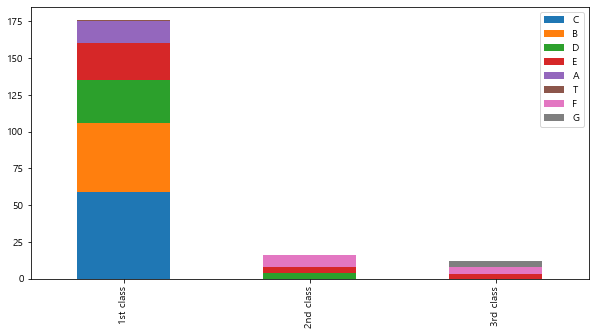

In [81]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))


In [82]:
cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [83]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [84]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0.0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2.0
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,0.0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2.0


### 동승자 컬럼 합치기

In [85]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [86]:
train['FamilySize'].value_counts()
test['FamilySize'].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

In [87]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [88]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,2
1,2,1,1,1,3.0,2.0,0.8,1,2,2
2,3,1,3,1,1.0,0.0,2.0,0,1,1
3,4,1,1,1,2.0,2.0,0.8,0,2,2
4,5,0,3,0,2.0,0.0,2.0,0,0,1


In [89]:
train = train.drop(['PassengerId'], axis=1)

In [90]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [91]:
print(train_data.shape, target.shape)

(891, 8) (891,)


In [92]:
train_data.to_csv("data/titanic/train_data.csv", index = False)
target.to_csv("data/titanic/target.csv", index = False)

## 4. Modeling
    -KNN
    -Decision Tree
    -Random Forest
    -SVM
    -Naive Bayes

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [96]:
train_data=pd.read_csv("data/titanic/train_data.csv")
target=pd.read_csv("data/titanic/target.csv",header=None)

In [97]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,2
1,1,1,3.0,2.0,0.8,1,2,2
2,3,1,1.0,0.0,2.0,0,1,1
3,1,1,2.0,2.0,0.8,0,2,2
4,3,0,2.0,0.0,2.0,0,0,1


In [103]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [104]:
print(score)
round(up.mean(score)*100,2)

NameError: name 'score' is not defined

In [ ]:
#Ddsision Tree
